In [12]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time

from aux_functions import *
from generation import generation as gen
from local_search import local_search as ls



In [89]:
n, quota, matrix, dataset = load_dataset('problems/instances/A1/symmetric/10.1.in')

A = np.matrix(matrix,dtype=float)
G = nx.from_numpy_array(A)


for i in G.nodes:
    G.nodes[i]['bonus'] = dataset[i].bonus


# matriz com o custo da aresta representando o loop Aii := Pi
for i in range(0, len(G.nodes)):
    G.add_edge(i, i, weight = dataset[i].penalty)


route = [0, 6, 4, 7, 5]

route_edges = [(route[i-1], route[i])
                   for i in range(len(route))]

# Create a numpy array with the same shape as the adjacency matrix



# Get the number of nodes in the route
num_nodes = len(G.nodes)

# Initialize the matrix with zeros
edges_incidence = np.zeros((num_nodes, num_nodes))

node_incidence = vector = [1 if i in route else 0 for i in range(len(G.nodes))]

# Set the entries in the matrix to 1 for the route edges
for edge in route_edges:
    edges_incidence[edge[0], edge[1]] = 1

for i in G.nodes:
    edges_incidence[i, i] = 1 - node_incidence[i]


# xii = 1 - yi

cost = 0
for i in range(0, len(G.nodes)):
    for j in range(0, len(G.nodes)):
        cost += G[i][j]['weight'] * edges_incidence[i][j]

print(cost)

# Calculate the sum of the edge weights in the subgraph
# weight_sum = sum([G[u][v]['weight'] for u, v in subgraph.edges])


# nx.draw(in_subgraph, with_labels=True)
# plt.figure()
# nx.draw(out_subgraph, with_labels=True)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
967.0


Graph with 10 nodes and 45 edges
[(0, 1, {'weight': 193.0}), (0, 2, {'weight': 139.0}), (0, 3, {'weight': 134.0}), (0, 4, {'weight': 231.0}), (0, 5, {'weight': 158.0}), (0, 6, {'weight': 152.0}), (0, 7, {'weight': 249.0}), (0, 8, {'weight': 196.0}), (0, 9, {'weight': 171.0}), (1, 2, {'weight': 209.0}), (1, 3, {'weight': 136.0}), (1, 4, {'weight': 131.0}), (1, 5, {'weight': 227.0}), (1, 6, {'weight': 174.0}), (1, 7, {'weight': 149.0}), (1, 8, {'weight': 246.0}), (1, 9, {'weight': 240.0}), (2, 3, {'weight': 205.0}), (2, 4, {'weight': 132.0}), (2, 5, {'weight': 127.0}), (2, 6, {'weight': 224.0}), (2, 7, {'weight': 170.0}), (2, 8, {'weight': 146.0}), (2, 9, {'weight': 242.0}), (3, 4, {'weight': 202.0}), (3, 5, {'weight': 149.0}), (3, 6, {'weight': 124.0}), (3, 7, {'weight': 220.0}), (3, 8, {'weight': 167.0}), (3, 9, {'weight': 142.0}), (4, 5, {'weight': 198.0}), (4, 6, {'weight': 145.0}), (4, 7, {'weight': 120.0}), (4, 8, {'weight': 217.0}), (4, 9, {'weight': 163.0}), (5, 6, {'weight': 195

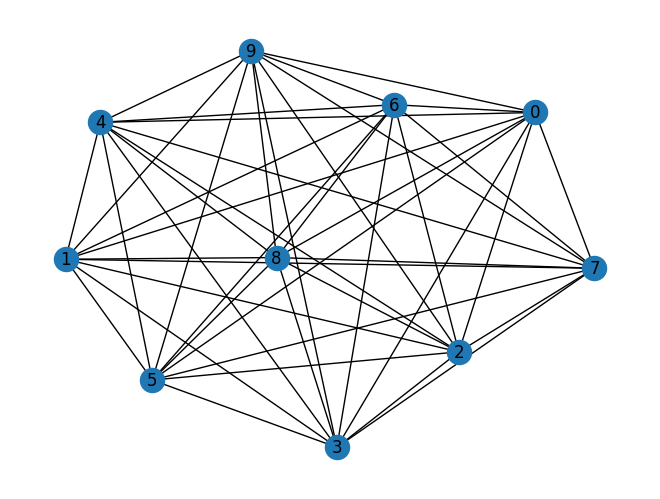

In [23]:
n, quota, matrix, dataset = load_dataset('problems/instances/A1/symmetric/10.1.in')

A = np.matrix(matrix,dtype=float)
G = nx.from_numpy_array(A)

print(G)
print(G.edges(data=True))

start_time = time.perf_counter()

for i in G.nodes:
    G.nodes[i]['bonus'] = dataset[i].bonus
    G.nodes[i]['penalty'] =  dataset[i].penalty
    G.nodes[i]['id'] = dataset[i].id

finish_time = time.perf_counter()

duration = finish_time - start_time

print('duration - ', duration)

nx.draw(G, with_labels=True)

In [3]:
# TEST

for i in range(1):
    start_time = time.perf_counter()
    route = gen.test_algorithm(G, quota)
    finish_time = time.perf_counter()

    duration = finish_time - start_time

    print(duration)


6.756362699903548


In [ ]:
from optimization import solve_pctsp

# node_prizes, node_penalties, matrix, quota = load_other_dataset('problems/other_instances/v20.txt')

# TODO: Investigar problema em instancias mais complexas

node_prizes = list(map(lambda node: node.bonus, dataset))
node_penalties = list(map(lambda node: node.penalty, dataset))

# print(node_prizes)
# print(node_penalties)
# print(matrix)
# print(quota)

tour, cost = solve_pctsp(node_prizes, node_penalties, matrix, quota)

if tour is None:
    print('No solution found.')
else:
    print('Tour:', tour)
    print('Cost:', cost)


In [ ]:
# MEMETICO

with open('memetic_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.memetic_algorithm(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')

# start_time = time.perf_counter()
# route = gen.memetic_algorithm(G, quota)
# finish_time = time.perf_counter()
# cost = route_cost(route, G)

# duration = finish_time - start_time
# report(duration, route, G)
# plot(route, G)

In [ ]:
# MEMETICO VNS VND

with open('vns_vnd_memetic_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.vns_vnd_memetic_algorithm(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')

# start_time = time.perf_counter()
# route = gen.memetic_algorithm(G, quota)
# finish_time = time.perf_counter()
# cost = route_cost(route, G)

# duration = finish_time - start_time
# report(duration, route, G)
# plot(route, G)

In [ ]:
# MEMETICO VNS

with open('vns_memetic_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.vns_memetic_algorithm(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')

# start_time = time.perf_counter()
# route = gen.memetic_algorithm(G, quota)
# finish_time = time.perf_counter()
# cost = route_cost(route, G)

# duration = finish_time - start_time
# report(duration, route, G)
# plot(route, G)

In [ ]:
# MEMETICO VND

with open('vnd_memetic_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.vnd_memetic_algorithm(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')

# start_time = time.perf_counter()
# route = gen.memetic_algorithm(G, quota)
# finish_time = time.perf_counter()
# cost = route_cost(route, G)

# duration = finish_time - start_time
# report(duration, route, G)
# plot(route, G)

In [ ]:
# GENETICO

with open('genetic_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.genetic_algorithm(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')


# start_time = time.perf_counter()
# route = gen.genetic_algorithm(G, quota)
# finish_time = time.perf_counter()
# cost = route_cost(route, G)

# duration = finish_time - start_time
# report(duration, route, G)
# plot(route, G)

In [ ]:
# GRASP

with open('grasp_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.grasp_algorithm(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')

# start_time = time.perf_counter()

# route = gen.grasp_algorithm(G, quota)
    
# finish_time = time.perf_counter()
# duration = finish_time - start_time
# report(duration, route, G)
# plot(route, G)



In [ ]:
# ADAPTATIVE GRASP

with open('reactive_grasp_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.reactive_grasp_algorithm(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')

# start_time = time.perf_counter()

# route = gen.adaptative_grasp_algorithm(G, quota)

# finish_time = time.perf_counter()
# duration = finish_time - start_time
# report(duration, route, G)
# plot(route, G)

In [ ]:
# GRASP VNS VND

with open('grasp_vns_vnd_history.txt', 'w') as file:
        file.write('iteration;duration(s);cost;route\n')

        for i in range(1):
            start_time = time.perf_counter()
            route = gen.grasp_vns_vnd(G, quota)
            finish_time = time.perf_counter()
            cost = route_cost(route, G)

            duration = finish_time - start_time

            route_ids = list(map(lambda node: node['id'], route))

            file.write(f'{i+1};{duration:.2f};{cost};{route_ids}\n')


In [ ]:
# cost = route_cost(route, G)
# bonus = calculate_bonus_colected(route, G)
# print('cost', cost)
# print('bonus', bonus)